In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citypy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates[15]

(-42.07168757646708, -5.535277994182664)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

625

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=9b101279fe367494d145ab61d9cdfae4


In [18]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
    # If an error is esperienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    
    # Add 1 to the record count.
    record_count += 1
    
# Indicate that Data Loading is complete.
print("--------------------------------")
print("Data Retrieval Complete         ")
print("--------------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | luena
Processing Record 2 of Set 1 | kozhva
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | hlobyne
Processing Record 5 of Set 1 | olinda
Processing Record 6 of Set 1 | usakos
Processing Record 7 of Set 1 | buchanan
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | sao filipe
Processing Record 11 of Set 1 | gogrial
Processing Record 12 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 13 of Set 1 | colorado
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | narsaq
Processing Record 17 of Set 1 | rawson
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | thunder bay
Processing Record 20 of Set 1 | hluti
Processing Record 21 of Set 1 | klaksvik
Processing Record 22 of Set 1 | tasiilaq
Processing Record 23 

Processing Record 40 of Set 4 | kutum
Processing Record 41 of Set 4 | souillac
Processing Record 42 of Set 4 | presidencia roque saenz pena
Processing Record 43 of Set 4 | zaraza
Processing Record 44 of Set 4 | jashpurnagar
Processing Record 45 of Set 4 | jibuti
Processing Record 46 of Set 4 | yarada
Processing Record 47 of Set 4 | san matias
Processing Record 48 of Set 4 | monaghan
Processing Record 49 of Set 4 | esil
Processing Record 50 of Set 4 | santiago de cao
Processing Record 1 of Set 5 | yining
Processing Record 2 of Set 5 | mrirt
City not found. Skipping...
Processing Record 3 of Set 5 | san ramon
Processing Record 4 of Set 5 | mizdah
Processing Record 5 of Set 5 | pemba
Processing Record 6 of Set 5 | skvyra
Processing Record 7 of Set 5 | nanortalik
Processing Record 8 of Set 5 | hofn
Processing Record 9 of Set 5 | malangali
Processing Record 10 of Set 5 | san cristobal
Processing Record 11 of Set 5 | walvis bay
Processing Record 12 of Set 5 | asilah
Processing Record 13 of S

Processing Record 31 of Set 8 | farafangana
Processing Record 32 of Set 8 | tabou
Processing Record 33 of Set 8 | malwan
City not found. Skipping...
Processing Record 34 of Set 8 | luau
Processing Record 35 of Set 8 | chapeco
Processing Record 36 of Set 8 | caraballeda
Processing Record 37 of Set 8 | kruisfontein
Processing Record 38 of Set 8 | mehamn
Processing Record 39 of Set 8 | tornio
Processing Record 40 of Set 8 | itarema
Processing Record 41 of Set 8 | birjand
Processing Record 42 of Set 8 | tawkar
City not found. Skipping...
Processing Record 43 of Set 8 | kasongo-lunda
Processing Record 44 of Set 8 | yarmouth
Processing Record 45 of Set 8 | mayor pablo lagerenza
Processing Record 46 of Set 8 | antsohihy
Processing Record 47 of Set 8 | rabo de peixe
Processing Record 48 of Set 8 | chalmette
Processing Record 49 of Set 8 | dhidhdhoo
Processing Record 50 of Set 8 | begunitsy
Processing Record 1 of Set 9 | okhtyrka
Processing Record 2 of Set 9 | natitingou
Processing Record 3 of 

City not found. Skipping...
Processing Record 16 of Set 12 | harer
Processing Record 17 of Set 12 | tshikapa
Processing Record 18 of Set 12 | norrtalje
Processing Record 19 of Set 12 | buqayq
City not found. Skipping...
Processing Record 20 of Set 12 | turbat
Processing Record 21 of Set 12 | yanam
Processing Record 22 of Set 12 | awjilah
Processing Record 23 of Set 12 | iglino
Processing Record 24 of Set 12 | sal rei
Processing Record 25 of Set 12 | terrace bay
Processing Record 26 of Set 12 | santa cruz
Processing Record 27 of Set 12 | kisangani
Processing Record 28 of Set 12 | sao mateus do maranhao
Processing Record 29 of Set 12 | longlac
City not found. Skipping...
Processing Record 30 of Set 12 | addis zemen
City not found. Skipping...
Processing Record 31 of Set 12 | savannah bight
Processing Record 32 of Set 12 | ngaoundere
Processing Record 33 of Set 12 | sao goncalo do sapucai
Processing Record 34 of Set 12 | ojhar
Processing Record 35 of Set 12 | inhambane
Processing Record 3

In [19]:
len(city_data)

581

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudness,Wind Speed,Country,Date
0,Luena,-11.78,19.92,77.00,78,40,4.70,AO,2020-02-21 08:45:39
1,Kozhva,65.11,57.05,16.77,88,17,2.84,RU,2020-02-21 08:45:39
2,Hermanus,-34.42,19.23,75.00,66,0,3.00,ZA,2020-02-21 08:45:39
3,Hlobyne,49.39,33.26,38.75,58,70,6.31,UA,2020-02-21 08:45:39
4,Olinda,-8.01,-34.86,77.00,83,20,3.36,BR,2020-02-21 08:45:39
5,Usakos,-22.00,15.60,81.97,52,88,4.45,NA,2020-02-21 08:45:40
6,Buchanan,5.88,-10.05,77.00,94,75,4.70,LR,2020-02-21 08:45:40
7,Jamestown,42.10,-79.24,21.99,72,90,8.05,US,2020-02-21 08:45:40
8,Busselton,-33.65,115.33,90.00,33,93,3.00,AU,2020-02-21 08:45:40
9,Sao Filipe,14.90,-24.50,69.46,76,68,18.88,CV,2020-02-21 08:45:40


In [23]:
# Reordering the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudness,Wind Speed
0,Luena,AO,2020-02-21 08:45:39,-11.78,19.92,77.00,78,40,4.70
1,Kozhva,RU,2020-02-21 08:45:39,65.11,57.05,16.77,88,17,2.84
2,Hermanus,ZA,2020-02-21 08:45:39,-34.42,19.23,75.00,66,0,3.00
3,Hlobyne,UA,2020-02-21 08:45:39,49.39,33.26,38.75,58,70,6.31
4,Olinda,BR,2020-02-21 08:45:39,-8.01,-34.86,77.00,83,20,3.36
5,Usakos,NA,2020-02-21 08:45:40,-22.00,15.60,81.97,52,88,4.45
6,Buchanan,LR,2020-02-21 08:45:40,5.88,-10.05,77.00,94,75,4.70
7,Jamestown,US,2020-02-21 08:45:40,42.10,-79.24,21.99,72,90,8.05
8,Busselton,AU,2020-02-21 08:45:40,-33.65,115.33,90.00,33,93,3.00
9,Sao Filipe,CV,2020-02-21 08:45:40,14.90,-24.50,69.46,76,68,18.88


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudness"]
wind_speed = city_data_df["Wind Speed"]

In [28]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/21/20'

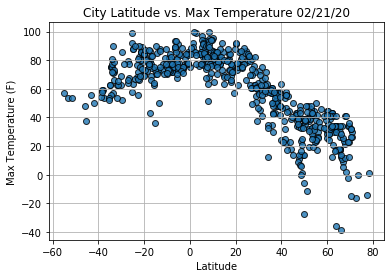

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

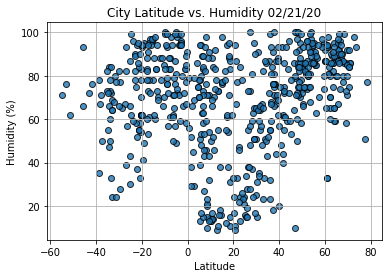

In [30]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, 
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + today)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

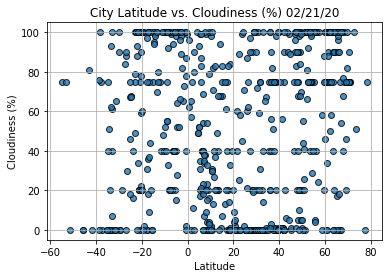

In [31]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, 
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + today)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

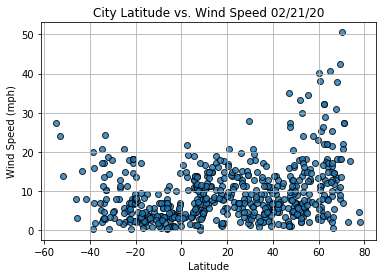

In [32]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, 
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + today)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()